In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import datetime
from glob import glob


In [2]:
dailyDf = pd.read_csv("../data/data/합천_댐기상종합.csv", index_col=0)
dailyDf.index = pd.to_datetime(dailyDf.index)

In [13]:
data = pd.read_csv(f'../data/data/합천_댐기상종합_forTrain.csv',
                       encoding="utf-8-sig", index_col=0)
data.index = pd.to_datetime(data.index)
data.head()


전일유입량     저수위(현재)     저수량(현재)  저수위(예년)  저수량(예년)      현재저수율  당일유입량   
2000-01-01    7.4  166.892500  513.350000   155.19    340.0  65.000000    4.4  \
2000-01-02    4.4  166.822500  512.137500   155.13    339.1  64.845833    4.7   
2000-01-03    4.7  166.699167  509.795833   155.06    338.0  64.554167    3.8   
2000-01-04    3.8  166.620417  508.370833   154.99    337.0  64.354167    6.1   
2000-01-05    6.1  166.519583  506.537500   154.93    336.1  64.120833    8.0   

            홍수기      저수위변화       저수량변화  ...  이슬점온도(°C)    현지기압(hPa)   
2000-01-01  0.0  11.702500  173.350000  ...  -2.562500  1022.395833  \
2000-01-02  0.0  11.692500  173.037500  ...   0.887500  1013.941667   
2000-01-03  0.0  11.639167  171.795833  ...  -7.058333  1016.700000   
2000-01-04  0.0  11.630417  171.370833  ...  -7.879167  1020.979167   
2000-01-05  0.0  11.589583  170.437500  ...  -2.991667  1017.450000   

              해면기압(hPa)    일조(hr)  적설(cm)  최저운고(100m )      시정(10m)  지면온도(°C)   
2000-01-01  1026.575000  0.229167     0.3        10.00  1593.750000  3.864583  \
2000-01-02  1018.020833  0.087500     0.3        10.00  1329.166667  5.345833   
2000-01-03  1020.891667  0.393333     0.3        10.00  1764.583333  2.275000   
2000-01-04  1025.204167  0.361667     0.3        10.00  1612.500000  1.862500   
2000-01-05  1021.616667  0.061667     0.3        10.75  1283.333333  3.862500   

              1일후강수량    2일후강수량  
2000-01-01  0.000000  0.000000  
2000-01-02  0.000000  0.000000  
2000-01-03  0.000000  0.187500  
2000-01-04  0.187500  1.020833  
2000-01-05  1.020833  0.135417  

[5 rows x 32 columns]

In [14]:
data.columns

Index(['전일유입량', '저수위(현재)', '저수량(현재)', '저수위(예년)', '저수량(예년)', '현재저수율', '당일유입량',
       '홍수기', '저수위변화', '저수량변화', '강우변화', 'sin_day_of_week', 'cos_day_of_week',
       'sin_month', 'cos_month', 'sin_week_of_year', 'cos_week_of_year',
       '기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '증기압(hPa)', '이슬점온도(°C)',
       '현지기압(hPa)', '해면기압(hPa)', '일조(hr)', '적설(cm)', '최저운고(100m )', '시정(10m)',
       '지면온도(°C)', '1일후강수량', '2일후강수량'],
      dtype='object')

In [10]:

# data['1일후유입량'] = data['당일유입량'][1:].reset_index()['당일유입량']
# data['2일후유입량'] = data['당일유입량'][2:].reset_index()['당일유입량']
# 저수위(현재),저수량(현재),저수위(예년),저수량(예년), 예년누계강우량,강우량전일,금년누계강우량
data['저수위변화'] = data['저수위(현재)'] - data['저수위(예년)']
data['저수량변화'] = data['저수량(현재)'] - data['저수량(예년)']
data['강우변화'] = data['금년누계강우량'] - data['예년누계강우량']

mask = data.columns.str.contains('발전') | data.columns.str.contains('전년') | data.columns.str.contains('방류') | data.columns.str.contains('연간') | data.columns.str.contains('강우량')
# data = data.iloc[:-2,]
data  =data[[x for x in data.columns if x not in data.columns[mask]]]

In [11]:
data


전일유입량     저수위(현재)     저수량(현재)  저수위(예년)  저수량(예년)      현재저수율  당일유입량   
시간                                                                              
2000-01-01    7.4  166.892500  513.350000   155.19    340.0  65.000000    4.4  \
2000-01-02    4.4  166.822500  512.137500   155.13    339.1  64.845833    4.7   
2000-01-03    4.7  166.699167  509.795833   155.06    338.0  64.554167    3.8   
2000-01-04    3.8  166.620417  508.370833   154.99    337.0  64.354167    6.1   
2000-01-05    6.1  166.519583  506.537500   154.93    336.1  64.120833    8.0   
...           ...         ...         ...      ...      ...        ...    ...   
2023-04-01    2.7  146.269583  212.637500   155.21    326.0  26.900000    2.3   
2023-04-02    2.3  146.250000  212.441667   155.17    325.5  26.900000    2.6   
2023-04-03    2.6  146.230417  212.216667   155.13    324.9  26.870833    3.1   
2023-04-04    3.1  146.209583  212.000000   155.09    324.3  26.829167    3.3   
2023-04-05    3.3  146.246250  212.400000   155.05    323.7  26.891667    0.6   

            홍수기      저수위변화       저수량변화       강우변화  
시간                                                 
2000-01-01  0.0  11.702500  173.350000  -0.600000  
2000-01-02  0.0  11.692500  173.037500  -0.500000  
2000-01-03  0.0  11.639167  171.795833  -0.800000  
2000-01-04  0.0  11.630417  171.370833  -1.600000  
2000-01-05  0.0  11.589583  170.437500  -2.062500  
...         ...        ...         ...        ...  
2023-04-01  0.0  -8.940417 -113.362500 -44.700000  
2023-04-02  0.0  -8.920000 -113.058333 -46.300000  
2023-04-03  0.0  -8.899583 -112.683333 -47.900000  
2023-04-04  0.0  -8.880417 -112.300000 -48.441667  
2023-04-05  0.0  -8.803750 -111.300000 -28.508333  

[8496 rows x 11 columns]

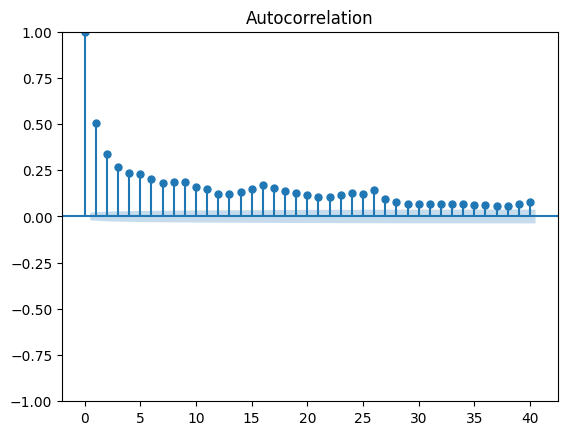

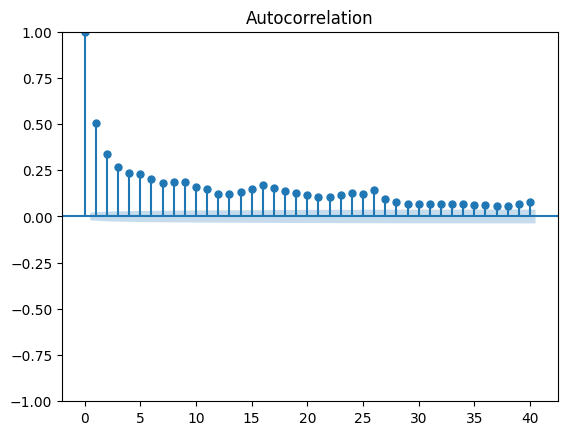

In [9]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(dailyDf.당일유입량)

In [ ]:
dailyDf.columns

In [ ]:
plt.rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False  ## 추가해줍니다. 
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['axes.grid'] = True
sns.lineplot(dailyDf, x=dailyDf.index, y='전일유입량')
# sns.lineplot(dailyDf, x='시간', y='발전량(실적)', label="실적량")
plt.ylabel("(mm)")
plt.title("전체 전일유입량")

In [ ]:
# plot with 2 different axes for a dataset with different scales
# left side

fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(56,9))
plt.rcParams["figure.figsize"] = (14,4)


color_1 = 'tab:blue'
ax1.set_title('실적 발전량과 계획대비 발전률')
ax1.set_ylabel('실적발전량', color=color_1)
ax1.plot(dailyDf.index, dailyDf['발전량(실적)'], color=color_1)
ax1.tick_params(axis='y', labelcolor=color_1)

# right side with different scale
ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis
color_2 = 'tab:red'
ax2.set_ylabel('계획대비 발전률', color=color_2)
ax2.plot(dailyDf.index, dailyDf['발전량(계획대비)'],  color=color_2)
ax2.tick_params(axis='y', labelcolor=color_2)


fig.tight_layout()
plt.show()

In [ ]:
sns.lineplot((dailyDf['발전량(실적)']-dailyDf['발전량(계획)']))
plt.title("전체 실적발전량-계획발전량")
plt.ylabel('(MwH)')
plt.axhline(0)

In [ ]:
dailyDf['실적-계획'] = np.where((dailyDf['발전량(실적)']-dailyDf['발전량(계획)'])>=0 , '초과' , '부족')
dailyDf['실적-계획'] = np.where((dailyDf['발전량(실적)']-dailyDf['발전량(계획)'])==0 , '적절계획' , dailyDf['실적-계획'])



In [ ]:
df2016 = dailyDf['2016-01-01 00:00:00': '2017-01-01 00:00:00']
df2017 = dailyDf['2017-01-01 00:00:00': '2018-01-01 00:00:00']
df2018 = dailyDf['2018-01-01 00:00:00': '2019-01-01 00:00:00']
df2019 = dailyDf['2019-01-01 00:00:00': '2020-01-01 00:00:00']
df2020 = dailyDf['2020-01-01 00:00:00': '2021-01-01 00:00:00']
df2021 = dailyDf['2021-01-01 00:00:00': '2022-01-01 00:00:00']



In [ ]:
plt.figure(figsize=(20,15))
plt.title('16-21 전일유입량')

plt.subplot(3,2,1)
plt.plot(df2016.index, df2016['전일유입량'])
plt.title('2016')

plt.subplot(3,2,2)
plt.plot(df2017.index, df2017['전일유입량'])
plt.title('2017')

plt.subplot(3,2,3)
plt.plot(df2018.index, df2018['전일유입량'])
plt.title('2018')

plt.subplot(3,2,4)
plt.plot(df2019.index, df2019['전일유입량'])
plt.title('2019')

plt.subplot(3,2,5)
plt.plot(df2020.index, df2020['전일유입량'])
plt.title('2020')

plt.subplot(3,2,6)
plt.plot(df2021.index, df2021['전일유입량'])
plt.title('2021')



In [ ]:
dailyDf['실적-계획'].unique()

In [ ]:
plt.pie(dailyDf['실적-계획'].value_counts(), labels=dailyDf['실적-계획'].unique(),autopct='%1.1f%%', startangle=90, explode=(0.1,0,0))
plt.title("계획발전량과 실적발전량 비교")